# Задание №1

Взяв в качестве модели непрерывного изображения дискретное изображение с достаточно малыми шагами дискретизации, так, что на нем четко различимы самые мелкие детали и присутствуют выраженные периодические структуры с малыми периодами следования (кирпичная кладка, черепица, решетка забора и т.п.), провести его «дискретизацию» со все возрастающими шагами путем последовательного прореживания отсчетов. Затем восстановить «непрерывное» изображение по полученным указанным способом дискретным изображениям, используя формулу Котельникова. Провести визуальную оценку зависимости качества восстановленного изображения от шага дискретизации.

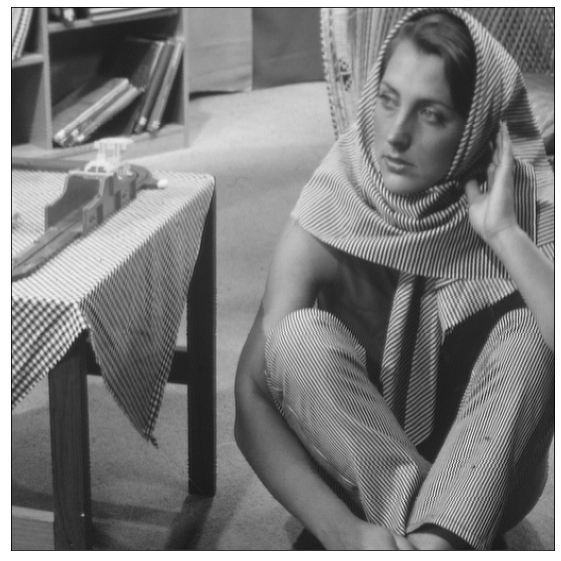

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from PIL import Image
%matplotlib inline

img = Image.open('Barbara.png') # исходное изображение
fig, ax = plt.subplots()

ax.imshow(img)
#ax.set_title('Исходное изображение')
ax.set_xticks([])
ax.set_yticks([])

fig.set_figwidth(10)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()


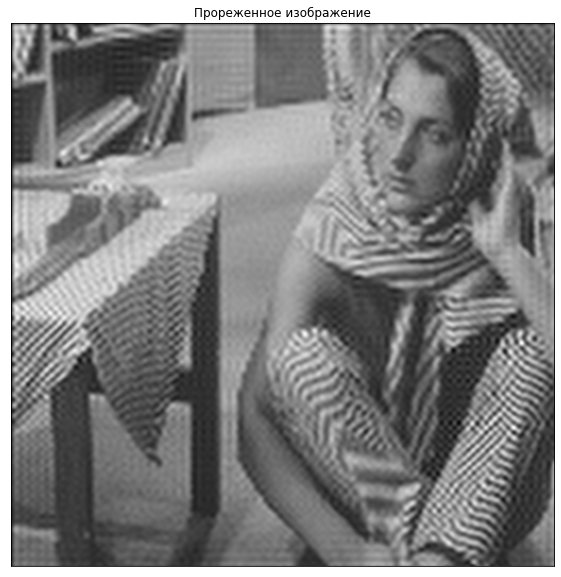

In [2]:
img = np.array(img)

M, N = img.shape # размеры исходного изображения
k = 4 # коэф. прореживания – натуральное число!
Mk = math.floor(M/k) # строк в прореженном изображении
Nk = math.floor(N/k) # столбцов в прореженном изображении

img_temp = img[0:Mk*k:k, 0:Nk*k:k] # прореженное изображение
# функциии Котельникова задаем таблично в SincArray

ColumnInd = np.arange(1,max(Mk,Nk) + 1) # 

SincArray = np.zeros((max(M,N),max(Mk,Nk)))
for j in range(0,max(M,N)):
    SincArray[j,:] = np.sinc((j + 1)/k - ColumnInd)

# Интерполированное по формуле Котельникова изображение:
img2 = np.dot(np.dot(SincArray[:M,:Mk], img_temp), SincArray[:N,:Nk].T)

fig, ax = plt.subplots()

ax.imshow(img2, cmap = cm.gray)
ax.set_title('Прореженное изображение')
ax.set_xticks([])
ax.set_yticks([])

fig.set_figwidth(10)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()

В результате прореживания на фрагментах изображения, содержащих периодические структуры (см. "Прореженное изображение"), начинают появляться полосы, имеющие ложные (отсутствовавшие в оригинальном изображении) пространственные частоты колебаний, которые возникли из-за «подмены» более высоких оригинальных частот спектра. При увеличении k частоты ложных колебаний меняются, а визуальное качество изображения ухудшается, т. к. из него удаляется каждый k-й пиксель по вертикали и каждый k-й пиксель по горизонтали.

# Задание №2

Используя программу MATLAB из примера 1.8 и какое-либо «свое» изображение с плавными переходами уровней яркости, воспроизведите результаты обработки, аналогичные представленным на рис. 1.5. Затем, модифицировав программу, проведите обработку того же изображения по схеме примера 1.9.

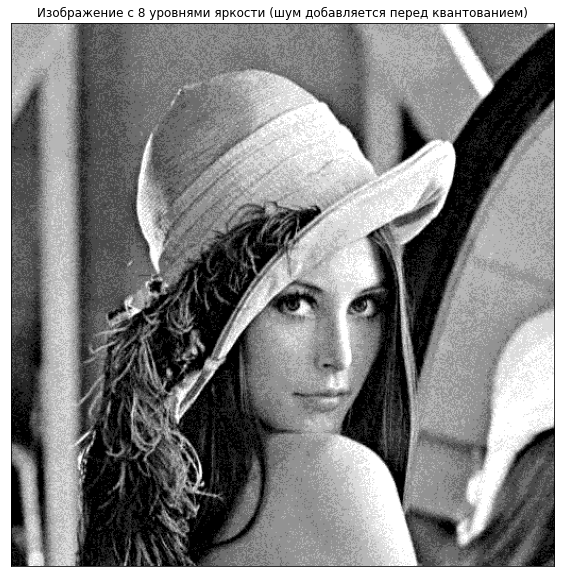

In [3]:
img = Image.open('Lena.png') # исходное изображение

img = np.array(img)

img1 = img.copy()

M, N = img.shape # размеры исходного изображения

L = 8

q = 256/L
noise = q*(np.random.rand(M,N) - 0.5)

img1_n = img1 + noise

img1_n_q = np.zeros((M,N))

indices = np.zeros((M,N), dtype = bool)

threshold = q

for level in range(1,L):
    indices = threshold <= img1_n
    img1_n_q[indices] = np.round(level * q)
    threshold = threshold + q
    
img1_n_q = img1_n_q + np.floor(q/2)

fig, ax = plt.subplots()

ax.imshow(img1_n_q, cmap = cm.gray)
ax.set_title('Изображение с ' + str(L) + ' уровнями яркости (шум добавляется перед квантованием)')
ax.set_xticks([])
ax.set_yticks([])

fig.set_figwidth(10)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()

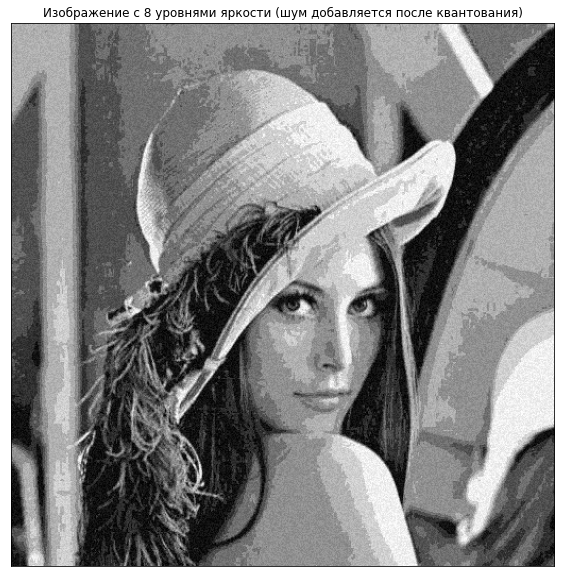

In [4]:
img = Image.open('Lena.png') # исходное изображение

img = np.array(img)

img1 = img.copy()

M, N = img.shape # размеры исходного изображения

L = 8

q = 256/L
noise = q*(np.random.rand(M,N) - 0.5)

img1_n = img1

img1_n_q = np.zeros((M,N))

indices = np.zeros((M,N), dtype = bool)

threshold = q

for level in range(1,L):
    indices = threshold <= img1_n
    img1_n_q[indices] = np.round(level * q)
    threshold = threshold + q
    
img1_n_q = img1_n_q + np.floor(q/2) + noise

fig, ax = plt.subplots()

ax.imshow(img1_n_q, cmap = cm.gray)
ax.set_title('Изображение с ' + str(L) + ' уровнями яркости (шум добавляется после квантования)')
ax.set_xticks([])
ax.set_yticks([])

fig.set_figwidth(10)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()

+ При добавлении шума перед квантованием наблюдается разрушение ложных контуров. Это объясняется переходом некоторых пикселей, с j-ого уровня квантования на (j+1)-й уровень и некоторых других из них – на (j-1)-й уровень (при j = 1,..., L - 2 ) вследствие добавления шума.


+ При прибавлении к изображению, проквантованному на L уровней, случайного шума с непрерывным законом распределения эффект квантования яркости ослабевает и получается изображение с множеством возможных значений яркости. Визуальный эффект от указанных действий состоит в появлении на изображении с ложными контурами дополнительной зашумленности, воспринимаемой как «зернистость».

# Задание №3

Выбрав какое-то монохроматическое изображение, имеющее плавные переходы яркости и представление уровней яркости 8 бит на пиксель или выше (имеет смысл взять то же изображение, что и в предыдущем задании 2), проделать с ним следующее.

1. Преобразовать изображение к представлению с 16 уровнями яркости, привести его гистограмму (в Матлаб см. imhist). Оценить энтропию первого порядка (модель источника без памяти) по частотам гистограммы:

$$\tilde{H} = -\displaystyle\sum_{k=1}^{16} v_klog_2(v_k)$$

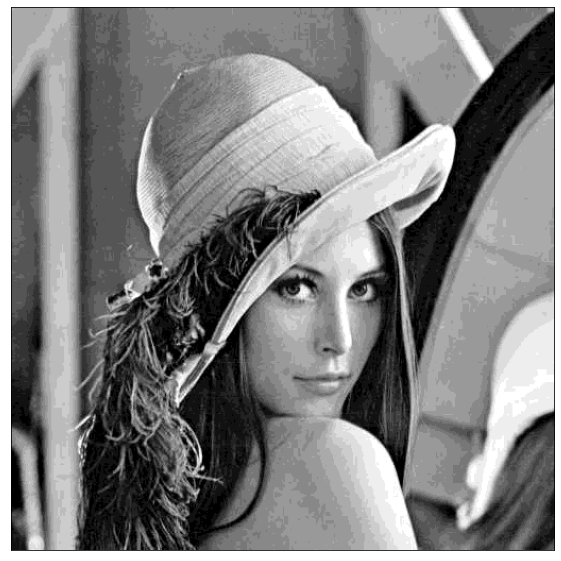

In [5]:
img = Image.open('Lena.png') # исходное изображение


img = np.array(img)

img1 = img.copy()

M, N = img.shape # размеры исходного изображения

L = 16

q = 256/L

img1_n = img1

img1_n_q = np.zeros((M,N))

indices = np.zeros((M,N), dtype = bool)

threshold = q

for level in range(1,L):
    indices = threshold <= img1_n
    img1_n_q[indices] = np.round(level * q)
    threshold = threshold + q
    
img1_n_q = img1_n_q + np.floor(q/2)

fig, ax = plt.subplots()

ax.imshow(img1_n_q, cmap = cm.gray)
#ax.set_title('Изображение с ' + str(L) + ' уровнями яркости (без добавления шума)')
ax.set_xticks([])
ax.set_yticks([])

fig.set_figwidth(10)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()

Энтропия первого порядка равна: H = 3.870264486148076


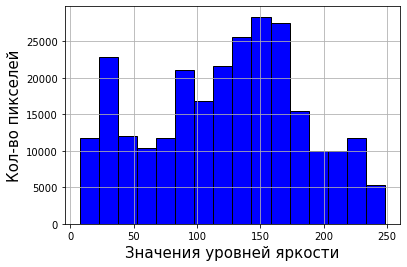

In [6]:
x = np.reshape(img1_n_q,newshape = (img1_n_q.size))

fig, ax = plt.subplots()
mas = ax.hist(x, bins = L, color = 'blue', edgecolor = 'black')
ax.set_xlabel('Значения уровней яркости', size = 15)
ax.set_ylabel('Кол-во пикселей', size = 15)
ax.grid(True)
#fig.savefig("1_hist.png", dpi = 150)

v = np.array(mas[0])/img1_n_q.size # Вычисляем частоты гистограммы
H1 = -np.dot(np.log2(v),v)
print("Энтропия первого порядка равна: H =",H1)

2. Повторить пункт 1, предварительно добавив к изображению равномерно распределенный шум $\delta \sim R[-q/2;q/2]$.

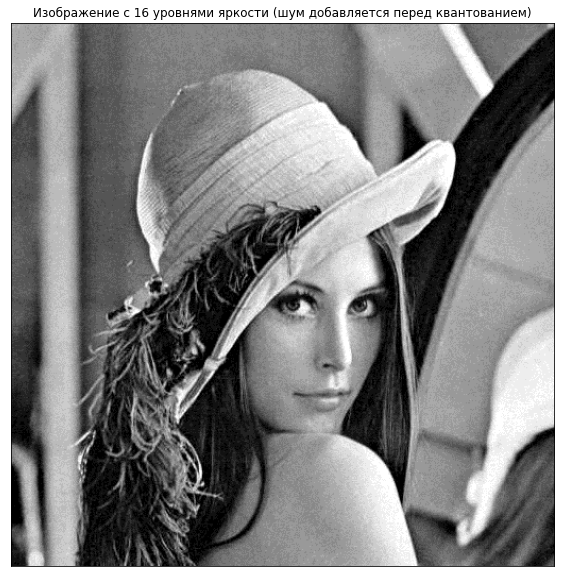

In [7]:
img = Image.open('Lena.png') # исходное изображение

img = np.array(img)

img2 = img.copy()

M, N = img.shape # размеры исходного изображения

L = 16

q = 256/L
noise = q*(np.random.rand(M,N) - 0.5)

img2_n = img2 + noise

img2_n_q = np.zeros((M,N))

indices = np.zeros((M,N), dtype = bool)

threshold = q

for level in range(1,L):
    indices = threshold <= img2_n
    img2_n_q[indices] = np.round(level * q)
    threshold = threshold + q
    
img2_n_q = img2_n_q + np.floor(q/2)

fig, ax = plt.subplots()

ax.imshow(img2_n_q, cmap = cm.gray)
ax.set_title('Изображение с ' + str(L) + ' уровнями яркости (шум добавляется перед квантованием)')
ax.set_xticks([])
ax.set_yticks([])


fig.set_figwidth(10)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()

3. Сравнить гистограммы 16-уровневых изображений, полученных в п.1 и п.2, значения полученной оценки энтропии 1-го порядка. Объяснить результаты.

Энтропия первого порядка для проквантованного изображения (без добавления шума): H1 = 3.870264486148076
Энтропия первого порядка для проквантованного изображения (с добавлением шума перед квантованием): H2 = 3.8781761389639398


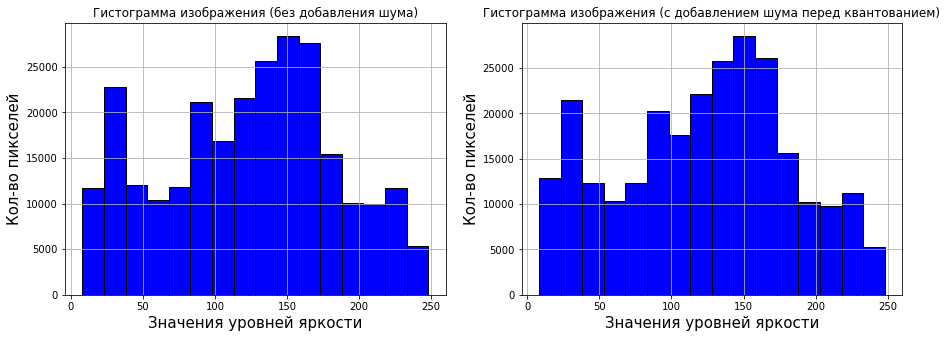

In [8]:
x2 = np.reshape(img2_n_q,newshape = (img2_n_q.size))

fig, ax = plt.subplots(1,2, figsize=(15,5))


mas = ax[0].hist(x, bins = L, color = 'blue', edgecolor = 'black')
ax[0].set_xlabel('Значения уровней яркости', size = 15)
ax[0].set_ylabel('Кол-во пикселей', size = 15)
ax[0].set_title('Гистограмма изображения (без добавления шума)')
ax[0].grid(True)


mas2 = ax[1].hist(x2, bins = L, color = 'blue', edgecolor = 'black')
ax[1].set_xlabel('Значения уровней яркости', size = 15)
ax[1].set_ylabel('Кол-во пикселей', size = 15)
ax[1].set_title('Гистограмма изображения (с добавлением шума перед квантованием)')
ax[1].grid(True)
#fig.savefig("2_hist.png", dpi = 150)

v = np.array(mas2[0])/img2_n_q.size
H2 = -np.dot(np.log2(v),v)
print("Энтропия первого порядка для проквантованного изображения (без добавления шума): H1 =",H1)
print("Энтропия первого порядка для проквантованного изображения (с добавлением шума перед квантованием): H2 =",H2)

Можно заметить, что при добавлении шума значение энтропии для проквантованного изображения увеличивается. По гистограммам изображений видно, что яркости пикселей изображения изменяются так, что высокие столбцы гистограммы "подтягиваются" вниз, а низкие - вверх. Это связано с увеличением энтропии (своё максимальное значение $\tilde{H}_{max} = log_2(N) = log_2(16) = 4$, N - число уровней яркости, она принимает при $v_1 = v_2 = ... = v_{16} = 1/16$). Таким образом, при увеличении $\tilde{H}$ количество пикселей в столбцах, соответствующих различным уровням яркости, "подтягивается" к значению $512^2 / 16 = 512^2 / N = 16384$.

4. Полученные 16-уровневые изображения из п.1 и п.2, сохраненные в формате BMP (grayscale), сжать стандартным архиватором ZIP или RAR, сравнить и объяснить полученные результаты.

In [9]:
im = Image.fromarray(np.array(img1_n_q, dtype = 'uint8'), mode = 'L')
im.save("1.bmp", format = "bmp")
im = Image.fromarray(np.array(img2_n_q, dtype = 'uint8'), mode = 'L')
im.save("2.bmp", format = "bmp")

In [10]:
import zipfile

first_im = zipfile.ZipFile('1.zip', 'w')
first_im.write('1.bmp', compress_type=zipfile.ZIP_DEFLATED)
second_im = zipfile.ZipFile('2.zip', 'w')
second_im.write('2.bmp', compress_type=zipfile.ZIP_DEFLATED)
 
first_im.close()
second_im.close()

При сжатии полученных 16-уровневых изображений ZIP-архиватором можно заметить, что изображение с добавленным перед квантованием равномерным шумом демонстрирует результаты сжатия, уступающие результатам сжатия изображения, проквантованного без добавления шума.

# Выводы

В работе были рассмотрены:
    
+ дискретизация изображений с прореживанием, а также возникающий при этом эффект наложения частот;


+ квантование изображений с добавлением равномерного шума (до/после квантования) для разрушения ложных контуров, а также без него.


Установлено, что

+ при неправильном выборе шага дискретизации на изображении могут возникать периодические структуры, имеющие ложные (отсутствовавшие в оригинальном изображении) пространственные частоты колебаний, которые возникают из-за «подмены» более высоких оригинальных частот спектра (эффект "наложения частот");


+ добавление к изображению равномерного шума $\delta \sim R[-q/2;q/2]$ перед квантованием помогает избежать возникновения ложных контуров, однако добавление шума также вызывает увеличение энтропии и уменьшение эффективности сжатия изображения, обработанного таким образом;


+ добавление к изображению равномерного шума после квантования не помогает избежать возникновения ложных контуров, а лишь вызывает появление "зернистости" на изображении.

In [291]:
im = Image.fromarray(np.array(img2_n_q, dtype = 'uint8'), mode = 'L')
im.save("Квантование 3 (с шумом).png", format = "png")